In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# getting data

base_path = '../input/house-prices-advanced-regression-techniques'
df_train = pd.read_csv(os.path.join(base_path,'train.csv'), index_col='Id')
df_test  = pd.read_csv(os.path.join(base_path,'test.csv'), index_col='Id')

In [3]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(df_train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
features = ['MSZoning', 'LotArea', 'Street', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 
            'Foundation',  'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'GarageType', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
            'SaleType', 'SaleCondition', 'SalePrice'
           ]

In [7]:
# visualizing NaN data
data = df_train[features]
data.isna().sum()

MSZoning          0
LotArea           0
Street            0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
ExterQual         0
Foundation        0
Electrical        1
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
GarageType       81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [8]:
data.head()

,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,YearBuilt,YearRemodAdd,RoofStyle,...,BedroomAbvGr,KitchenAbvGr,GarageType,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,AllPub,Inside,Gtl,CollgCr,2003,2003,Gable,...,3,1,Attchd,2,548,2,2008,WD,Normal,208500
2,RL,9600,Pave,AllPub,FR2,Gtl,Veenker,1976,1976,Gable,...,3,1,Attchd,2,460,5,2007,WD,Normal,181500
3,RL,11250,Pave,AllPub,Inside,Gtl,CollgCr,2001,2002,Gable,...,3,1,Attchd,2,608,9,2008,WD,Normal,223500
4,RL,9550,Pave,AllPub,Corner,Gtl,Crawfor,1915,1970,Gable,...,3,1,Detchd,3,642,2,2006,WD,Abnorml,140000
5,RL,14260,Pave,AllPub,FR2,Gtl,NoRidge,2000,2000,Gable,...,4,1,Attchd,3,836,12,2008,WD,Normal,250000


In [9]:
# another imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

### Visualizing all sales by year

In [10]:
# sales by year
columns = ['YrSold', 'SaleCondition', 'SalePrice']
df_pivot = data[columns]
year_sales = df_pivot.groupby('YrSold').agg(['sum', 'min', 'mean', 'max'])
year_sales

SalePrice                              
             sum    min           mean     max
YrSold                                        
2006    57320530  35311  182549.458599  625000
2007    61214777  39300  186063.151976  755000
2008    53917695  40000  177360.838816  446261
2009    60648051  34900  179432.103550  582933
2010    31043893  55000  177393.674286  611657

In [11]:
year_sales.columns

MultiIndex([('SalePrice',  'sum'),
            ('SalePrice',  'min'),
            ('SalePrice', 'mean'),
            ('SalePrice',  'max')],
           )

<AxesSubplot:title={'center':'SalePrice'}, xlabel='YrSold'>

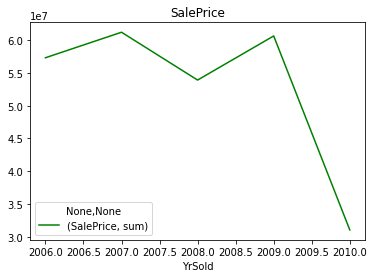

In [12]:
year_sales.plot(kind='line', y=('SalePrice',  'sum'), color='g', title='SalePrice')

### Visualizing sales by year in each Neighborhood

In [13]:
# sales by year
columns = ['Neighborhood', 'YrSold', 'SaleCondition', 'SalePrice']
df_pivot = data[columns]
year_sales = pd.DataFrame(df_pivot.groupby(['Neighborhood', 'YrSold']).SalePrice.sum())
year_sales

SalePrice
Neighborhood YrSold           
Blmngtn      2006      1519609
             2007       366701
             2008       350895
             2009       883600
             2010       192000
...                        ...
Timber       2009      1963500
             2010      1225800
Veenker      2006       820000
             2007      1074500
             2008       732000

[119 rows x 1 columns]

In [14]:
year_sales.reset_index(level='Neighborhood', inplace=True)
year_sales

,Neighborhood,SalePrice
YrSold,,
2006,Blmngtn,1519609
2007,Blmngtn,366701
2008,Blmngtn,350895
2009,Blmngtn,883600
2010,Blmngtn,192000
...,...,...
2009,Timber,1963500
2010,Timber,1225800
2006,Veenker,820000


In [15]:
df_pivot = pd.pivot_table(year_sales, index=year_sales.index, columns=['Neighborhood'], aggfunc='first')
df_pivot

SalePrice                                                       \
Neighborhood    Blmngtn   Blueste    BrDale    BrkSide    ClearCr    CollgCr   
YrSold                                                                         
2006          1519609.0       NaN  387000.0  1691200.0  1195000.0  6368525.0   
2007           366701.0       NaN  341500.0  1357375.0  1418000.0  6419998.0   
2008           350895.0  151000.0  380900.0  1703900.0  1671932.0  6757850.0   
2009           883600.0  124000.0  474500.0  2294900.0   679500.0  7500393.0   
2010           192000.0       NaN   88000.0   193000.0   987400.0  2648100.0   

                                                          ...             \
Neighborhood    Crawfor    Edwards    Gilbert     IDOTRR  ...    NoRidge   
YrSold                                                    ...              
2006          2162987.0  2553670.0  4806015.0   670311.0  ...  2901000.0   
2007          3776774.0  2254000.0  3457391.0  1427200.0  ...  4397040.0   
2008          2289700.0  3444300.0  1860000.0   641500.0  ...  1828500.0   
2009          1621900.0  3344100.0  3999100.0   447900.0  ...  2591000.0   
2010           890500.0  1225900.0  1113000.0   517669.0  ...  2029568.0   

                                                                     \
Neighborhood    NridgHt    OldTown      SWISU     Sawyer    SawyerW   
YrSold                                                                
2006          5193362.0  3535059.0   520500.0  2545500.0  1318300.0   
2007          5594996.0  2755071.0   375000.0  2276900.0  2511600.0   
2008          3989074.0  3691750.0  1116900.0  1675709.0  2024880.0   
2009          7109157.0  2793079.0  1128384.0  1506183.0  2759012.0   
2010          2466249.0  1714500.0   424000.0  2118400.0  2393000.0   

                                                          
Neighborhood    Somerst    StoneBr     Timber    Veenker  
YrSold                                                    
2006          3364302.0  2190280.0  1851400.0   820000.0  
2007          5597974.0  1397926.0  2524176.0  1074500.0  
2008          4512620.0   980000.0  1640527.0   732000.0  
2009          4253670.0  1599837.0  1963500.0        NaN  
2010          1654100.0  1594432.0  1225800.0        NaN  

[5 rows x 25 columns]

<AxesSubplot:xlabel='YrSold'>

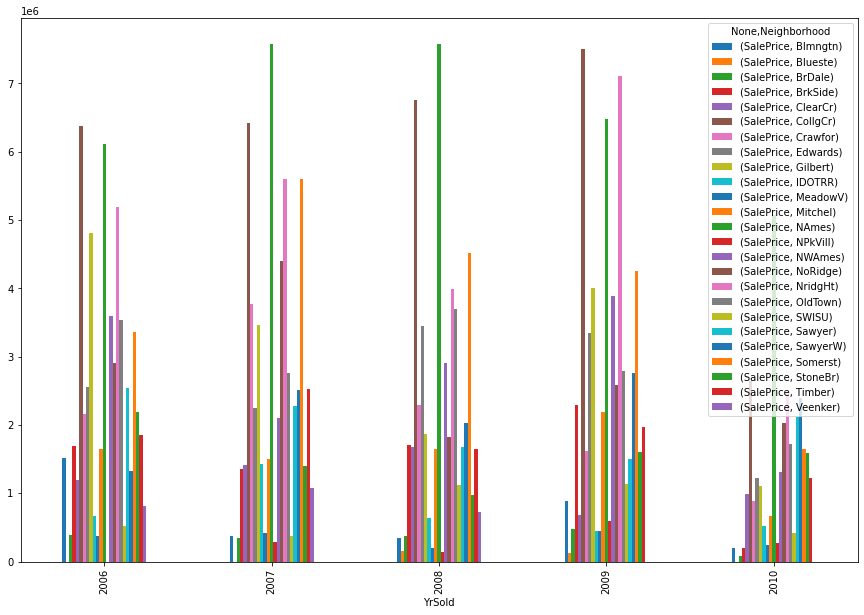

In [16]:
df_pivot.plot(kind='bar',figsize=(15,10))

### Visualizing the 10 Neighborhoods that had the biggest sales in all data

In [17]:
# getting the bigger sales
columns = ['Neighborhood','SalePrice']
df_ = data[columns]
df_ = pd.DataFrame(df_.groupby('Neighborhood').SalePrice.sum())
df_ = df_.sort_values(by='SalePrice', ascending=False)
df_ = df_[:10]

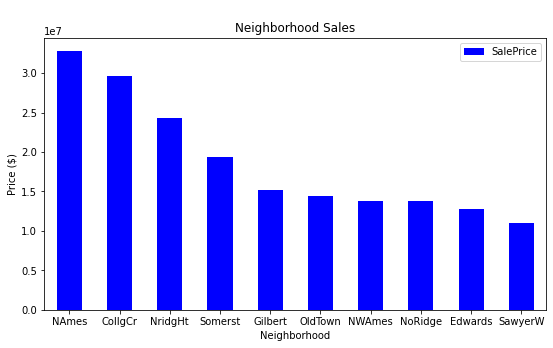

In [18]:
ax = df_.plot(kind='bar', title='\nNeighborhood Sales', rot=0, figsize=(9,5), color='b')
ax.set_ylabel('Price ($)')
plt.show()

### Analising the features 

In [19]:
import seaborn as sns

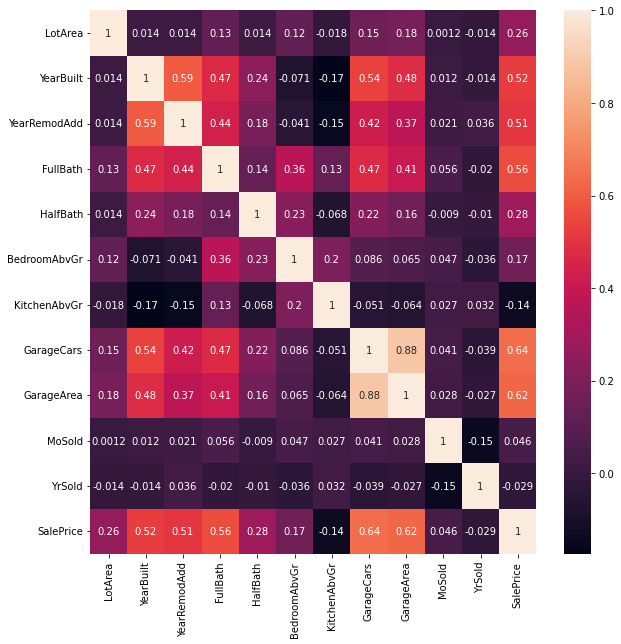

In [20]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

### Visualizing Prices for each feature with high correlation with SalePrice

In [21]:
feats = []
line = corr.loc[['SalePrice']]
for c in corr.columns:
    if line[c][0] > 0.5 and line[c][0] < 1:
        feats.append(c)
feats.append('SalePrice')

In [22]:
df_ = data[feats]
df_.head()

,YearBuilt,YearRemodAdd,FullBath,GarageCars,GarageArea,SalePrice
Id,,,,,,
1,2003,2003,2,2,548,208500
2,1976,1976,2,2,460,181500
3,2001,2002,2,2,608,223500
4,1915,1970,1,3,642,140000
5,2000,2000,2,3,836,250000


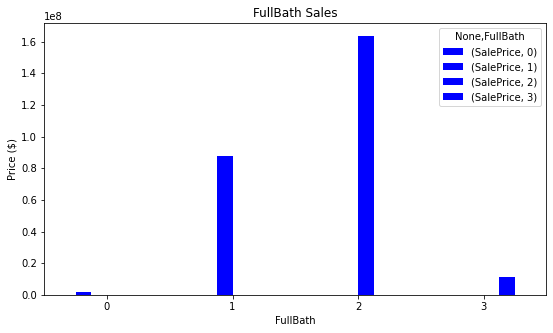

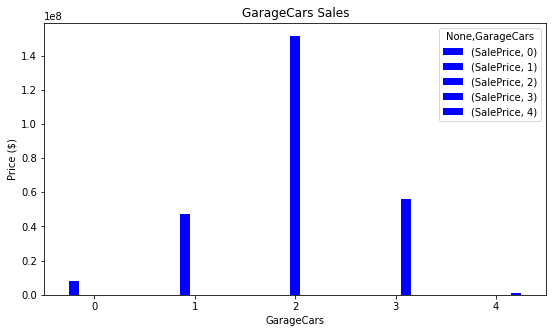

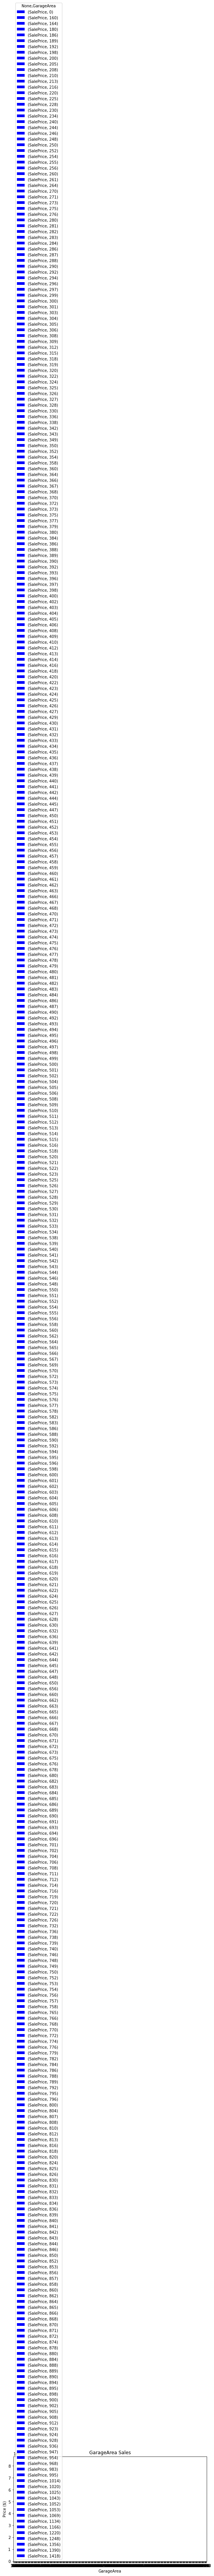

In [23]:
for f in feats[2:-1]:
    plt.close()
    df_pivot = pd.DataFrame(df_.groupby(f).SalePrice.sum())
    df_pivot = pd.pivot_table(df_pivot, index=df_pivot.index, columns=[f], aggfunc='first')
    ax = df_pivot.plot(kind='bar', title=f'{f} Sales', rot=0, figsize=(9,5), color='b')
    ax.set_ylabel('Price ($)')
    plt.show()

### Visualizing the data distribuition

In [24]:
data.dtypes

MSZoning         object
LotArea           int64
Street           object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
ExterQual        object
Foundation       object
Electrical       object
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
GarageType       object
GarageCars        int64
GarageArea        int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

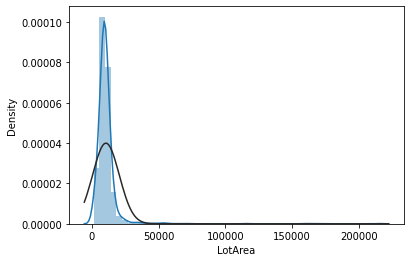

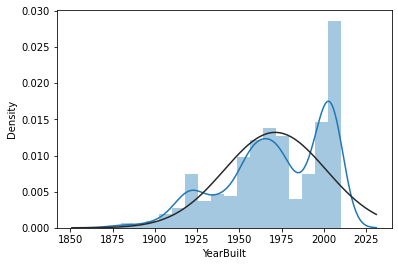

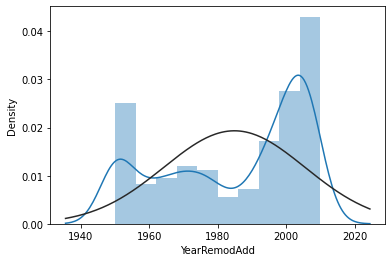

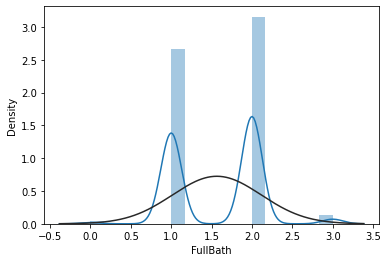

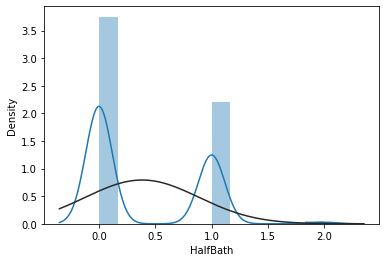

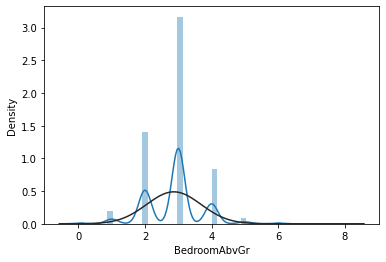

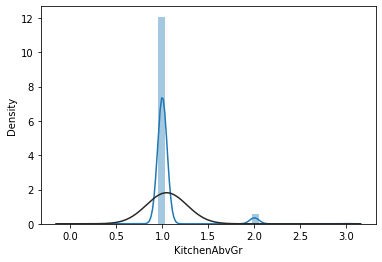

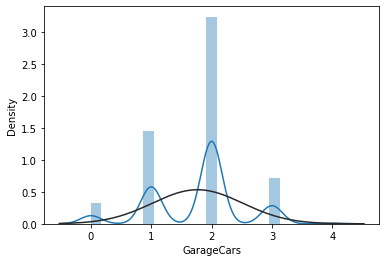

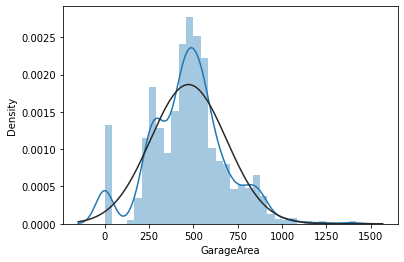

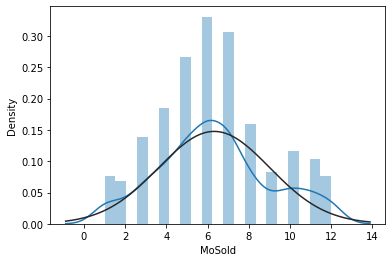

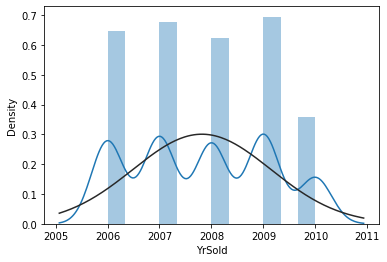

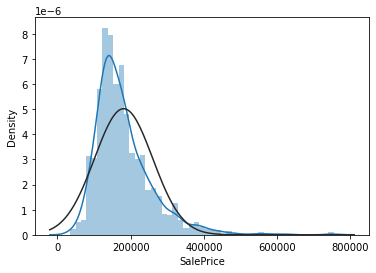

<Figure size 432x288 with 0 Axes>

In [25]:
for k in data.columns:
    # selecting the numerical data
    if data[k].dtypes == 'int64':
        sns.distplot(data[k], fit=norm);
        fig = plt.figure()

### Looking for outliers

In [26]:
len(data.columns)

26

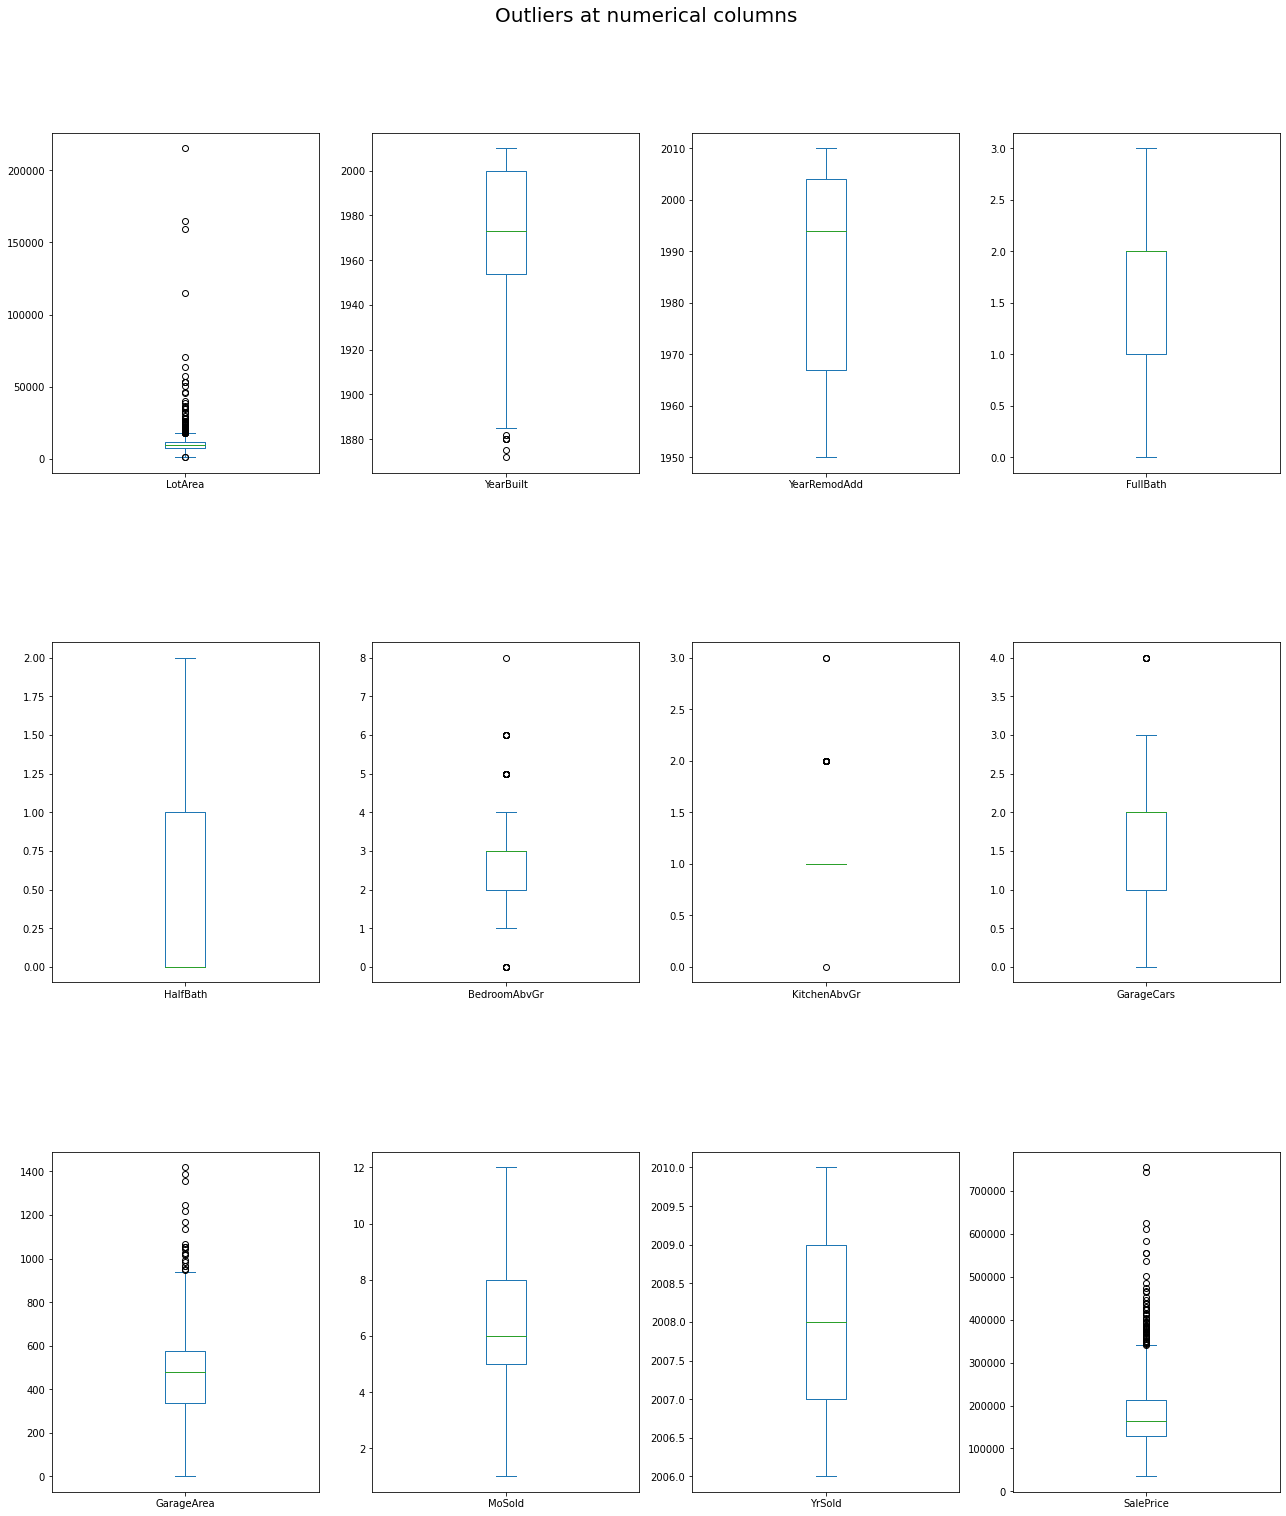

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(9, 6))
fig.suptitle("Outliers at numerical columns", fontsize=20, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in data.columns:
    if data[k].dtypes == 'int64':
        data.plot(y=k, kind='box', ax=axs.ravel()[i], figsize=(22,25))
        
        i += 1
        
plt.show()